<a href="https://colab.research.google.com/github/rajsingh018/Multilayer_Perceptron/blob/main/Patients_MLP/Patients_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import Perceptron

In [21]:
dataset=pd.read_csv('Paitients_Files.csv')

In [22]:
dataset.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive


In [23]:
dataset.isnull().sum()

ID           0
PRG          0
PL           0
PR           0
SK           0
TS           0
M11          0
BD2          0
Age          0
Insurance    0
Sepssis      0
dtype: int64

In [24]:
dataset.describe()

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000
mean,3.824708,120.153589,68.732888,20.562604,79.460768,31.920033,0.481187,33.290484,0.686144
std,3.362839,32.682364,19.335675,16.017622,116.576176,8.008227,0.337552,11.828446,0.464447
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.100000,0.248000,24.000000,0.000000
50%,3.000000,116.000000,70.000000,23.000000,36.000000,32.000000,0.383000,29.000000,1.000000
75%,6.000000,140.000000,80.000000,32.000000,123.500000,36.550000,0.647000,40.000000,1.000000
max,17.000000,198.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [25]:
X = dataset[dataset.columns[:-1]]

In [26]:
y = dataset['Sepssis']

In [27]:
X.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1


In [28]:
y.head()

0    Positive
1    Negative
2    Positive
3    Negative
4    Positive
Name: Sepssis, dtype: object

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sepssis', ylabel='count'>

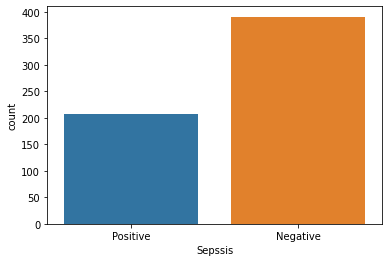

In [29]:
sns.countplot(dataset['Sepssis'])

In [30]:
y.value_counts()

Negative    391
Positive    208
Name: Sepssis, dtype: int64

In [31]:
from sklearn.preprocessing import LabelEncoder

In [32]:
le=LabelEncoder()

In [33]:
Z = dataset['ID']

In [34]:
for i in dataset.columns:
  dataset[i]=le.fit_transform(dataset[i])

In [35]:
dataset.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,0,6,84,21,28,0,118,299,29,0,1
1,1,1,21,18,22,0,58,170,10,0,0
2,2,8,116,16,0,0,28,314,11,1,1
3,3,1,25,18,16,56,73,43,0,1,0
4,4,0,73,3,28,92,200,434,12,1,1


In [37]:
Z.head()

0    ICU200010
1    ICU200011
2    ICU200012
3    ICU200013
4    ICU200014
Name: ID, dtype: object

In [47]:
X=dataset.iloc[:,0:10]
y = dataset.iloc[:,10]

In [48]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [49]:
mlp=MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)

In [50]:
mlp.fit(X_train, y_train.ravel())

MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)

In [51]:
predictions=mlp.predict(X_test)

In [52]:
from sklearn.metrics import confusion_matrix

In [53]:
cm_ann = confusion_matrix(y_test, predictions)
cm_ann


array([[98, 15],
       [51, 16]])

In [54]:
recall_ann = cm_ann[0][0]/(cm_ann[0][0] + cm_ann[0][1])
precision_ann = cm_ann[0][0]/(cm_ann[0][0]+cm_ann[1][1])
recall_ann,precision_ann

(0.8672566371681416, 0.8596491228070176)

In [55]:
from sklearn.metrics import accuracy_score
predicted= mlp.predict(X_test)
accuracy_score(predicted,y_test)

0.6333333333333333

In [56]:
df_output=pd.DataFrame()

In [57]:
df_output['Sepssis']=predictions

In [58]:
df_output['ID']=Z

In [59]:
df_output[['ID','Sepssis']].to_csv(r'output.csv',index=False)

In [60]:
output=pd.read_csv('output.csv')
output.head()

,ID,Sepssis
0,ICU200010,0
1,ICU200011,0
2,ICU200012,0
3,ICU200013,0
4,ICU200014,0


In [61]:
output.tail()

,ID,Sepssis
175,ICU200185,0
176,ICU200186,0
177,ICU200187,0
178,ICU200188,0
179,ICU200189,0
